In [32]:
#데이터 로드
from tensorflow import keras
(t_x, t_y),(tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()


In [33]:
t_x.shape, t_y.shape

((60000, 28, 28), (60000,))

In [34]:
tt_x.shape, tt_y.shape

((10000, 28, 28), (10000,))

In [35]:
import numpy as np
#다중 클래스 분류임을 알았다.
np.unique(t_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [36]:
len(t_x[0])

28

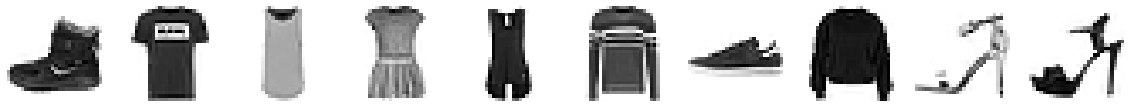

In [37]:
import matplotlib.pyplot as plt
fg, ax = plt.subplots(1,10, figsize = (20,20))
for i in range(10):
    ax[i].imshow(t_x[i], cmap='gray_r')
    ax[i].axis('off')
plt.show()

In [38]:
[t_y[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [39]:
s_t_x = t_x/255 #최대값 255로 데이터들을 모두 나눠 스케일링 
s_t_x = s_t_x.reshape(-1, 28*28) #이미지 하나를 한 줄로 펼쳐버림. 벡터화. 수학적 연산을 위해

In [40]:
s_t_x.shape # 784개의 차원

(60000, 784)

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
#sg = SGDClassifier(loss='log', max_iter=5, random_state = 42) #분류작업이라 오차를 log로? 
#sc = cross_validate(sg, s_t_x, t_y, return_train_score=True)
#np.mean(sc['test_score'])

In [42]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y = train_test_split(s_t_x, t_y, test_size=0.2, random_state=42)
s_tt_x = tt_x/255
tt_x = s_tt_x.reshape(-1, 28*28)

In [43]:
t_x.shape, tt_x.shape, v_x.shape

((48000, 784), (10000, 784), (12000, 784))

In [44]:
t_y.shape, tt_y.shape, v_y.shape 

((48000,), (10000,), (12000,))

In [45]:
m = keras.Sequential(keras.layers.Dense(10,activation='softmax',input_shape=(784,))) 
#모델을 만듦. 내용은 없이 전체적 구조만 만들고 파라미터로 내용을 넣어줬다.
#Dense가 뉴런(?), 10개 출력, 활성화함수는 다중클래스분류라 소프트맥스, 입력 차원은 784

In [48]:
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
#이미 존재하는 loss 함수
#넘 길어서 오타가 날 수도 있으니 부르는 것

In [50]:
m.compile(loss=sparse_categorical_crossentropy, metrics = 'accuracy') #학습방법
#비용함수를 불러오면 그대로 넣으면 된다.
#부르지 않았으면 '' 안에

In [51]:
m.fit(t_x, t_y, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4088 - accuracy: 0.8741
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8752
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4081 - accuracy: 0.8759
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4094 - accuracy: 0.8748
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4086 - accuracy: 0.8752
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4085 - accuracy: 0.8746
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4082 - accuracy: 0.8754
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4088 - accuracy: 0.8752
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4095 - accuracy: 0.8753
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.408

In [52]:
m.evaluate(t_x, t_y)
#앞이 loss값 뒤가 정확도

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4132 - accuracy: 0.8716


[0.4131651222705841, 0.8715833425521851]

In [53]:
m.evaluate(tt_x, tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.5733 - accuracy: 0.8299


[0.5733053684234619, 0.8299000263214111]

In [54]:
m.evaluate(v_x, v_y)

375/375 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.8423


[0.5361834168434143, 0.8423333168029785]

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense  #레이어 쌓기

데이터 수집

In [56]:
(t_x, t_y),(tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

In [58]:
t_x.shape, t_y.shape

((60000, 28, 28), (60000,))

데이터 전처리

In [60]:
s_t_x = t_x / 255.0 #실수연산에 실수를 직접 주는 것이 안정적
s_t_x = s_t_x.reshape(-1, 28*28)

In [61]:
s_tt_x = t_x / 255.0 #실수연산에 실수를 직접 주는 것이 안정적
s_tt_x = s_tt_x.reshape(-1, 28*28)

In [62]:
t_x, v_x, t_y, v_y = train_test_split(s_t_x, t_y, random_state=42, test_size = 0.2)

In [63]:
t_x.shape

(48000, 784)

모델 생성

In [73]:
m = Sequential() #모델에 이름 붙이기
m.add(Dense(100,activation='sigmoid',input_shape = (784,),name='hidden')) #입력단 레이어, 은닉층 요소 뉴런 100개
#레이어에도 이름 붙일 수 있다.
m.add(Dense(10,activation ='softmax', name = 'output')) #출력단 레이어. 다중클래스분류라서 소프트맥스

In [74]:
m.summary()
#입력 뉴런(784) * 은닉 뉴런(100) + 바이어스(100)
#은닉 뉴런(100) * 출력 뉴런(10) + 바이어스 (10) 
#파라미터의 개수가 공식의 개수 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''m.fit()
x=None, y=None, 
batch_size=None, 학습 사이즈
epochs=1,  학습 횟수
verbose='auto',  비주얼라이징?
callbacks=None, 실행 때 이상이 생기면 돌아온다. ex) 오버피팅 발생할 때 멈춰버림, 베스트 모델을 기억할 때
 validation_split=0.0, 학습할 때 검증 데이터를 만들어 검증한다. 비율 설정
 validation_data=None, 미리 정해놓은 검증데이터를 학습할 때 넣어줄 수 있다.
 shuffle=True,
 class_weight=None,
 sample_weight=None, 
initial_epoch=0, 
steps_per_epoch=None, 
validation_steps=None,
 validation_batch_size=None, 검증 데이터 배치 사이즈 조정
validation_freq=1, 
max_queue_size=10,
 workers=1, 
use_multiprocessing=False
'''

In [76]:
m.compile(loss=sparse_categorical_crossentropy,metrics='accuracy')
m.fit(t_x, t_y, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4081 - accuracy: 0.8522
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8665
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8790
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3214 - accuracy: 0.8829
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8875
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2998 - accuracy: 0.8905
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2917 - accuracy: 0.8939
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2824 - accuracy: 0.8979
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.275

In [78]:
print(m.evaluate(t_x, t_y))
print(m.evaluate(v_x, v_y))

1500/1500 [==============================] - 2s 2ms/step - loss: 0.2586 - accuracy: 0.9059
[0.258550763130188, 0.9058541655540466]
375/375 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8849
[0.3193715214729309, 0.8849166631698608]


In [79]:
m2 = Sequential()
m2.add(Dense(100,activation='relu',input_shape = (784,),name='hidden'))
m2.add(Dense(10,activation ='softmax', name = 'output'))

In [80]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [84]:
m2.compile(loss=sparse_categorical_crossentropy,metrics='accuracy')

In [85]:
m2.fit(t_x, t_y, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5285 - accuracy: 0.8141
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8611
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.8734
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3299 - accuracy: 0.8812
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8875
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8899
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8950
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2869 - accuracy: 0.8989
Epoch 9/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.9017
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.273

In [87]:
m2.evaluate(t_x, t_y)

1500/1500 [==============================] - 2s 2ms/step - loss: 0.2533 - accuracy: 0.9123


[0.25332358479499817, 0.9122708439826965]

In [88]:
m2.evaluate(v_x, v_y)

375/375 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8831


[0.389296293258667, 0.8830833435058594]

In [91]:
(X_data, y_data),(tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

In [92]:
X_data = X_data/255.0
tt_x = tt_x / 255.0

In [93]:
from tensorflow.keras.layers import Flatten
m3 = Sequential()
m3.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m3.add(Dense(100, activation='relu'))
m3.add(Dense(10, activation='softmax'))
m3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [94]:
m3.compile(loss=sparse_categorical_crossentropy,metrics='accuracy')

In [97]:
m3.fit(X_data, y_data, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8723 - val_loss: 0.3490 - val_accuracy: 0.8785
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8806 - val_loss: 0.3409 - val_accuracy: 0.8812
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3219 - accuracy: 0.8855 - val_loss: 0.3512 - val_accuracy: 0.8794
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3079 - accuracy: 0.8910 - val_loss: 0.3585 - val_accuracy: 0.8768
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2998 - accuracy: 0.8951 - val_loss: 0.3774 - val_accuracy: 0.8741


In [ ]:
#m3.compile(,)

In [ ]:
'''
compile
학습방법 파라미터
optimizer='rmsprop', 최적화 함수 
loss=None, 오차 함수
metrics=None, 
loss_weights=None, 
weighted_metrics=None, 
run_eagerly=None,
steps_per_execution=None,
jit_compile=None'''

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam #클래스라서 인스턴스를 만들고 사용해야 함
sgd = SGD(learning_rate=0.1)
m3.compile(optimizer=sgd) #약어로 'sgd'같은 형태도 있긴 함

In [99]:
(X_data, y_data),(tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

In [100]:
X_data = X_data/255.0
tt_x = tt_x/255.0

In [101]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam #클래스라서 인스턴스를 만들고 사용해야 함

In [ ]:
'sgd','rmsprop', 'adam'

In [102]:
m4 = Sequential()
m4.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m4.add(Dense(100, activation='relu'))
m4.add(Dense(10, activation='softmax'))
m4.summary()
m4.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [103]:
m4.fit(X_data, y_data, epochs=5)
m4.evaluate(tt_x, tt_y)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7408 - accuracy: 0.7570
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8247
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8382
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4438 - accuracy: 0.8457
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.8439


[0.4462364614009857, 0.8439000248908997]

In [104]:
m4.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
m4.fit(X_data, y_data, epochs=5)
m4.evaluate(tt_x, tt_y)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4501 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3477 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3285 - accuracy: 0.8837
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8680


[0.39929723739624023, 0.8679999709129333]

In [105]:
m4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
m4.fit(X_data, y_data, epochs=5) #fit 메소드에 리턴값이 있다. history값. 학습 내용(loss값과 accuracy) 기록
m4.evaluate(tt_x, tt_y)
#기본적으로 옵티마이저에 아담을 쓰면 성능이 좋음

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3037 - accuracy: 0.8912
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8974
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9008
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9046
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8782


[0.3572130501270294, 0.8781999945640564]

In [ ]:
m5 = Sequential()
m5.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m5.add(Dense(100, activation='relu'))
m5.add(Dense(10, activation='softmax'))
m5.summary()
m5.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [108]:
hy = m5.fit(X_data, y_data, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4196 - accuracy: 0.8494
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8693
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.8790
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3261 - accuracy: 0.8844
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3123 - accuracy: 0.8885
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3051 - accuracy: 0.8939
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.8943
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8977
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2861 - accuracy: 0.9005
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.280

In [109]:
hy.history.keys()

dict_keys(['loss', 'accuracy'])

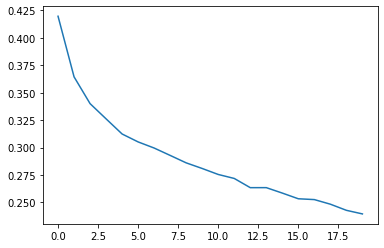

In [110]:
plt.plot(hy.history['loss'])

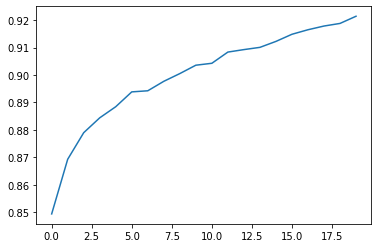

In [111]:
plt.plot(hy.history['accuracy'])

In [ ]:
m6 = Sequential()
m6.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m6.add(Dense(100, activation='relu'))
m6.add(Dense(10, activation='softmax'))
m6.summary()
m6.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [113]:
hy1 = m6.fit(X_data, y_data, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5387 - accuracy: 0.8112 - val_loss: 0.4249 - val_accuracy: 0.8549
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3946 - accuracy: 0.8576 - val_loss: 0.3990 - val_accuracy: 0.8642
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3554 - accuracy: 0.8725 - val_loss: 0.3830 - val_accuracy: 0.8654
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3354 - accuracy: 0.8796 - val_loss: 0.3934 - val_accuracy: 0.8651
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3223 - accuracy: 0.8850 - val_loss: 0.3540 - val_accuracy: 0.8790
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3089 - accuracy: 0.8894 - val_loss: 0.3807 - val_accuracy: 0.8738
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3031 - accuracy: 0.8932 - val_loss: 0.3720 - val_accuracy:

In [114]:
hy1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

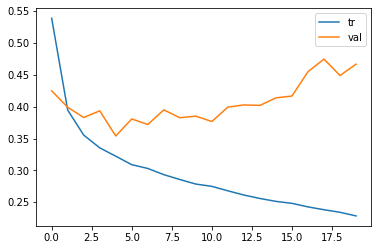

In [115]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.legend(['tr','val'])
plt.show()

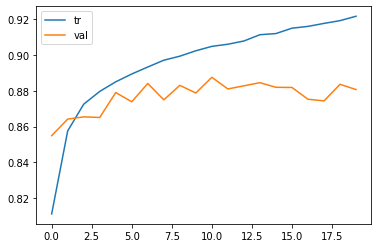

In [116]:
plt.plot(hy1.history['accuracy'])
plt.plot(hy1.history['val_accuracy'])
plt.legend(['tr','val'])
plt.show()

In [117]:
m7 = Sequential()
m7.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m7.add(Dense(100, activation='relu'))
m7.add(Dense(10, activation='softmax'))
m7.summary()
m7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [118]:
hy2 = m7.fit(X_data, y_data, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5195 - accuracy: 0.8187 - val_loss: 0.4291 - val_accuracy: 0.8455
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3913 - accuracy: 0.8605 - val_loss: 0.4077 - val_accuracy: 0.8495
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3517 - accuracy: 0.8713 - val_loss: 0.3694 - val_accuracy: 0.8655
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.8814 - val_loss: 0.3486 - val_accuracy: 0.8712
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8883 - val_loss: 0.3391 - val_accuracy: 0.8789
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2898 - accuracy: 0.8921 - val_loss: 0.3276 - val_accuracy: 0.8801
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2758 - accuracy: 0.8990 - val_loss: 0.3206 - val_accuracy:

In [122]:
hy2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

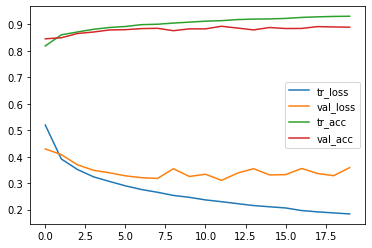

In [121]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.plot(hy2.history['accuracy'])
plt.plot(hy2.history['val_accuracy'])
plt.legend(['tr_loss','val_loss','tr_acc','val_acc'])
plt.show()
#오버피팅이 발생
#트레이닝 데이터는 1에 수렴, 밸리데이션 데이터는 발산해서, 
#뉴럴네트워크 모델, 뉴런이 피쳐를 저장하는 저장소. 그게 많아서 오버피팅
#뉴런이 사라지면 공식이 줄어드니까 피쳐에 대해 기억하는 정보가 줄어듦
#각각의 뉴런이 어떤 역할을 할지 모르기 때문에 학습할 때마다 사라지는 뉴런이 다르게 랜덤으로 줄이자.

In [123]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense, Dropout  #레이어 쌓기

In [124]:
m8 = Sequential()
m8.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m8.add(Dense(100, activation='relu'))
m8.add(Dropout(0.3)) #전 층의 레이어를 지나고 드롭할 거니까 그 사이에 드롭아웃 레이어를 넣자. 30퍼의 비율이란 뜻
#학습 중 내부에서 다음 레이어에 가중치를 전달 안함
m8.add(Dense(10, activation='softmax'))
m8.summary()
m8.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [125]:
hy3 = m8.fit(X_data, y_data, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5941 - accuracy: 0.7910 - val_loss: 0.4131 - val_accuracy: 0.8531
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4398 - accuracy: 0.8420 - val_loss: 0.3912 - val_accuracy: 0.8582
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4031 - accuracy: 0.8545 - val_loss: 0.3709 - val_accuracy: 0.8684
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3801 - accuracy: 0.8618 - val_loss: 0.3613 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3628 - accuracy: 0.8671 - val_loss: 0.3410 - val_accuracy: 0.8795
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3519 - accuracy: 0.8708 - val_loss: 0.3458 - val_accuracy: 0.8717
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3413 - accuracy: 0.8744 - val_loss: 0.3507 - val_accuracy:

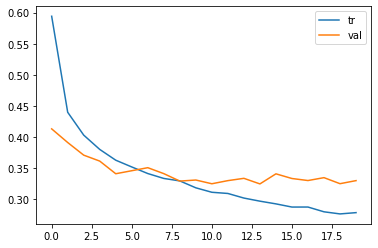

In [126]:
plt.plot(hy3.history['loss'])
plt.plot(hy3.history['val_loss'])
plt.legend(['tr','val'])
plt.show()

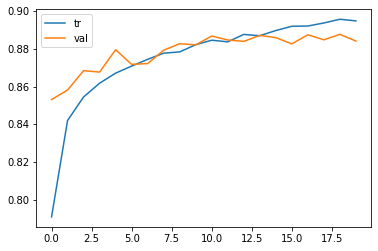

In [127]:
plt.plot(hy3.history['accuracy'])
plt.plot(hy3.history['val_accuracy'])
plt.legend(['tr','val'])
plt.show()

In [128]:
m8.save('m8_.h5')

In [129]:
m8.save_weights('m8_W.h5')

In [130]:
m9 = Sequential()
m9.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
m9.add(Dense(100, activation='relu'))
m9.add(Dropout(0.3)) #전 층의 레이어를 지나고 드롭할 거니까 그 사이에 드롭아웃 레이어를 넣자. 30퍼의 비율이란 뜻
#학습 중 내부에서 다음 레이어에 가중치를 전달 안함
m9.add(Dense(10, activation='softmax'))
m9.summary()
#저장한 모델을 집어넣으랴ㅕ고 학습방법을 설정 안함

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [133]:
m9.predict(X_data[:1])>0.5

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [134]:
m8.predict(X_data[:1])>0.5

array([[False, False, False, False, False, False, False, False, False,
         True]])

In [135]:
y_data[:1]

array([9], dtype=uint8)

In [136]:
m9.load_weights('m8_W.h5') #모델이 똑같이 생겨서 가중치를 불러올 수 있다.

In [137]:
m9.predict(X_data[:1])>0.5

array([[False, False, False, False, False, False, False, False, False,
         True]])

In [139]:
from tensorflow.keras.models import load_model
m10 = load_model('m8_.h5') #저장한 모델을 그대로 불러옴

In [140]:
m10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [141]:
m10.predict(X_data[:1]) >0.5

array([[False, False, False, False, False, False, False, False, False,
         True]])

총정리

In [142]:
#모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense, Dropout  #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

데이터 수집

In [143]:
(X_data, y_data),(tt_x, tt_y) = keras.datasets.fashion_mnist.load_data()

데이터 전처리

In [144]:
X_data = X_data/255.0
tt_x = tt_x / 255.0

In [145]:
t_x, v_x, t_y, v_y = train_test_split(X_data, y_data, random_state=42, test_size=0.2)

모델 생성 및 학습

In [146]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Flatten으로 벡터화 알아서 해줌. 입력하는 데이터는 그대로 넣어야함
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3)) #전 층의 레이어를 지나고 드롭할 거니까 그 사이에 드롭아웃 레이어를 넣자. 30퍼의 비율이란 뜻
#학습 중 내부에서 다음 레이어에 가중치를 전달 안함
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ck_p = ModelCheckpoint('best_m.h5')
es = EarlyStopping(patience=2,restore_best_weights=True)
hy = model.fit(t_x, t_y, epochs=100, validation_data=(v_x, v_y), callbacks=[ck_p,es])

In [ ]:
es.stopped_epoch #early stopping 동작했을 때가 몇 번째 epoch인가

테스트 및 검증

In [ ]:
model.evaluate(t_x, t_y)
model.evaluate(tt_x, tt_y)
model.evaluate(v_x, v_y)